<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2021/blob/main/seminar03/MLatFIAN2021_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [47]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target


506

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112924
test mse =  8.517501881762882


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Как я понимаю, кросс-валидация предполагает деление датасета на k-равных частей. Затем последовательно один из них откладывается в сторону, можель тренируется на (k-1) части, а тестируются предсказания модели на оставшемся. Такая процедура проводится для каждой части. 

In [43]:
from sklearn.model_selection import cross_validate

In [53]:
cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

{'fit_time': array([0.00595212, 0.01656818, 0.01986551, 0.00695276, 0.00703406,
        0.04910374, 0.00859356, 0.00673366, 0.00782132, 0.00929832]),
 'score_time': array([0.00238585, 0.00545335, 0.00248909, 0.00229859, 0.00243926,
        0.00267339, 0.00851917, 0.00244498, 0.00283265, 0.00733805]),
 'test_score': array([  -7.20636571,   -6.61068729,   -4.15868207,  -24.7825149 ,
         -17.72468543,  -20.63837964,  -15.54042827, -106.53803875,
         -18.75457154,  -14.01189426]),
 'train_score': array([-19.41000981, -19.55200553, -19.74665546, -17.92316363,
        -18.3512475 , -18.34681105, -18.82330278, -10.74271081,
        -18.3496723 , -18.61162265])}

In [54]:
cross_val = cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

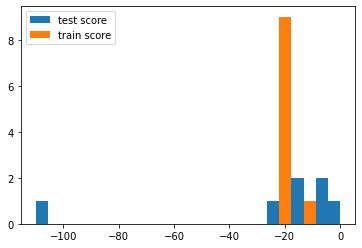

In [55]:
bins = np.linspace(-110,0,26)
plt.hist(cross_val['test_score'],bins,label = 'test score')
plt.hist(cross_val['train_score'],bins,label = 'train score')
plt.legend()
plt.show()

{'fit_time': array([0.00721383, 0.01057076, 0.02670646, 0.01196122, 0.00650001,
        0.04060936, 0.01309657, 0.03363347, 0.00780392, 0.00715613,
        0.01042891, 0.00699306, 0.00662017, 0.00675917, 0.02476144,
        0.00788331, 0.01224446, 0.00826812, 0.00761795, 0.00752401,
        0.00898838, 0.00702763, 0.00714588, 0.00931501, 0.00715971,
        0.00765276, 0.00701594, 0.00683808, 0.00681138, 0.00657439,
        0.00693321, 0.00672626, 0.00702381, 0.00657535, 0.00935245,
        0.00682974, 0.04885101, 0.01136756, 0.00659943, 0.00643373,
        0.00642467, 0.00704074, 0.0098834 , 0.00948715, 0.0109334 ,
        0.01106238, 0.01122856, 0.02591991, 0.01222348, 0.01812196,
        0.00712252, 0.00767684, 0.00818229, 0.01042843, 0.02628326,
        0.00720048, 0.00622034, 0.00666714, 0.00644708, 0.00632858,
        0.00636339, 0.00709963, 0.00634694, 0.00635839, 0.00768924,
        0.0049355 , 0.00512552, 0.00503731, 0.00495768, 0.0048728 ,
        0.00625539, 0.00632977, 0.00

In [19]:
cross_val_100 = cross_validate(model, X, y, cv=100, scoring='neg_mean_squared_error', return_train_score=True)

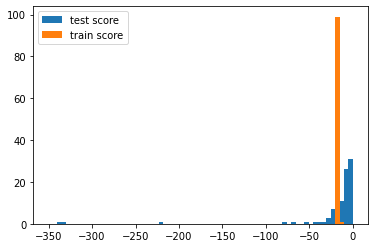

In [23]:
bins = np.linspace(-350,0,70)
plt.hist(cross_val_100['test_score'],bins,label = 'test score')
plt.hist(cross_val_100['train_score'],bins,label = 'train score')
plt.legend()
plt.show()


Не совсем понятно, как интерпретировать этот результат. Как мы видим, ошибка теста имеет некоторое нетривиальное распределение, в то время как ошибка при тренировке - нечто близкое дельта-функции. Интересно, что при увеличении параметра регуляризации $\alpha$ (сейчас он равен 0.1) подобное явление не исчезает.